<a href="https://colab.research.google.com/github/yusaks83/AntColonyOptimization/blob/master/D6_RFM_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 6
# RFM Segmentation

Today we learn about how to do RFM segmentation for 1 hour, and I will hand this to TAs for your TL Simulation, so this should be quick.

In [ ]:
# LIBRARY WE ALREADY KNOW
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LIBRARY WE WILL LEARN TODAY
# from statsmodels.graphics.mosaicplot import mosaic

# Introduction to RFM Segmentation

We already see from Day 5 that we can group our clients/customers based on many different aspects. We now introduce some additional grouping/segmentation techniques: RFM segmentation (today), k-means clustering (tomorrow)

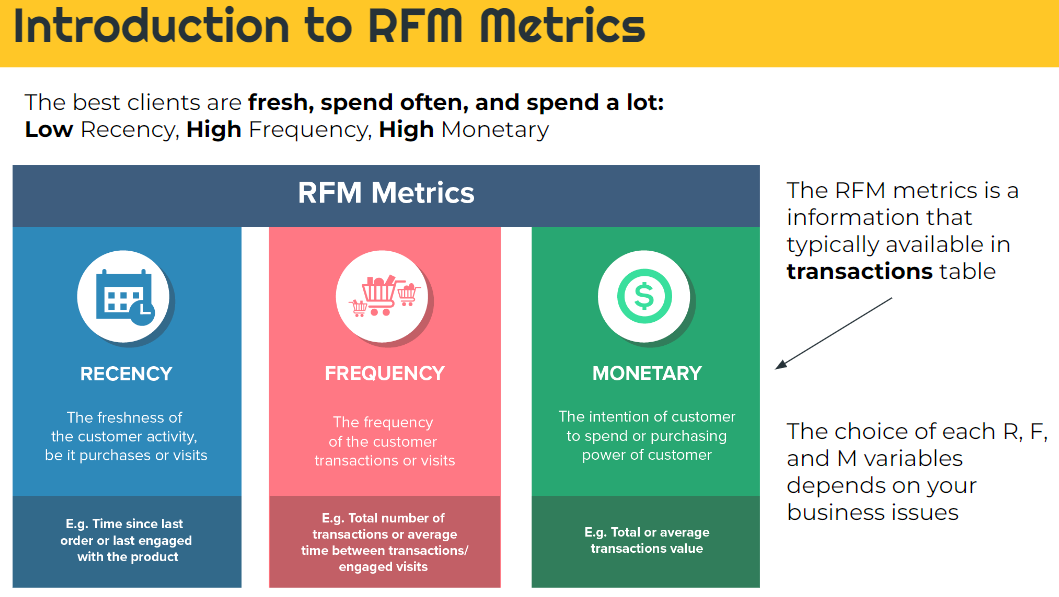

RFM segmentation is a technique to create customer segmentation based on three factors:
- **R**ecency: The freshness of customer activity (measured in days since last transaction)
- **F**requency: The frequency of customer transaction (measured in count of transaction)
- **M**onetary: The purchasing power of customer (measured in the total amount of transaction)

Best customer: Lowest R, Highest F and Highest M

R => represent time dimensions </br>
F => represent quantitative dimensions </br>
M => represent qualitative dimensions </br>

# Dataset: Transaction Behaviour

Let's download it from Day 5 Transaction Behaviour (https://drive.google.com/file/d/1pYBf30ueJgJTNdZJzAiy5pghTS1URMEw/view?usp=sharing)

In [ ]:
# Let's download the data files using gdown
url = "https://drive.google.com/file/d/1pYBf30ueJgJTNdZJzAiy5pghTS1URMEw/view?usp=sharing"
output = "rfm.pickle"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1pYBf30ueJgJTNdZJzAiy5pghTS1URMEw
To: /content/rfm.pickle
100%|██████████| 397k/397k [00:00<00:00, 44.5MB/s]


'rfm.pickle'

In [ ]:
rfm = pd.read_pickle('/content/rfm.pickle')
rfm

,account_id,recency,date,eom_balance,debit_total,debit_cnt,debit_avg,credit_total,credit_cnt,credit_avg
0,1,26.0,2018-12-31,13466.5,6952.0,2.0,3476.000000,3731.6,2.0,1865.800000
1,2,14.0,2018-12-31,42628.1,24466.0,5.0,4893.200000,30510.7,2.0,15255.350000
2,3,7.0,2018-12-31,51096.1,7561.0,4.0,1890.250000,11462.6,2.0,5731.300000
3,4,18.0,2018-12-31,33720.7,3963.0,3.0,1321.000000,5688.7,2.0,2844.350000
4,5,6.0,2018-12-31,28088.3,6738.0,5.0,1347.600000,5139.1,2.0,2569.550000
...,...,...,...,...,...,...,...,...,...,...
4495,11333,5.0,2018-12-31,58203.0,17100.0,3.0,5700.000000,365.0,2.0,182.500000
4496,11349,5.0,2018-12-31,33977.9,65691.0,8.0,8211.375000,63168.0,2.0,31584.000000
4497,11359,10.0,2018-12-31,75200.4,29372.0,6.0,4895.333333,40803.6,2.0,20401.800000
4498,11362,12.0,2018-12-31,38530.6,13567.0,6.0,2261.166667,24374.8,2.0,12187.400000


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   account_id    4500 non-null   int64         
 1   recency       4500 non-null   float64       
 2   date          4424 non-null   datetime64[ns]
 3   eom_balance   4424 non-null   float64       
 4   debit_total   4370 non-null   float64       
 5   debit_cnt     4370 non-null   float64       
 6   debit_avg     4370 non-null   float64       
 7   credit_total  4367 non-null   float64       
 8   credit_cnt    4367 non-null   float64       
 9   credit_avg    4367 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 386.7 KB


We have some null values on many different columns. For now, let's fill any null values with 0.

In [ ]:
rfm = rfm.fillna(0)
rfm

,account_id,recency,date,eom_balance,debit_total,debit_cnt,debit_avg,credit_total,credit_cnt,credit_avg
0,1,26.0,2018-12-31 00:00:00,13466.5,6952.0,2.0,3476.000000,3731.6,2.0,1865.800000
1,2,14.0,2018-12-31 00:00:00,42628.1,24466.0,5.0,4893.200000,30510.7,2.0,15255.350000
2,3,7.0,2018-12-31 00:00:00,51096.1,7561.0,4.0,1890.250000,11462.6,2.0,5731.300000
3,4,18.0,2018-12-31 00:00:00,33720.7,3963.0,3.0,1321.000000,5688.7,2.0,2844.350000
4,5,6.0,2018-12-31 00:00:00,28088.3,6738.0,5.0,1347.600000,5139.1,2.0,2569.550000
...,...,...,...,...,...,...,...,...,...,...
4495,11333,5.0,2018-12-31 00:00:00,58203.0,17100.0,3.0,5700.000000,365.0,2.0,182.500000
4496,11349,5.0,2018-12-31 00:00:00,33977.9,65691.0,8.0,8211.375000,63168.0,2.0,31584.000000
4497,11359,10.0,2018-12-31 00:00:00,75200.4,29372.0,6.0,4895.333333,40803.6,2.0,20401.800000
4498,11362,12.0,2018-12-31 00:00:00,38530.6,13567.0,6.0,2261.166667,24374.8,2.0,12187.400000


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    4500 non-null   int64  
 1   recency       4500 non-null   float64
 2   date          4500 non-null   object 
 3   eom_balance   4500 non-null   float64
 4   debit_total   4500 non-null   float64
 5   debit_cnt     4500 non-null   float64
 6   debit_avg     4500 non-null   float64
 7   credit_total  4500 non-null   float64
 8   credit_cnt    4500 non-null   float64
 9   credit_avg    4500 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 386.7+ KB


# **RFM Variables**

To do RFM segmentation, we need to identify which variables are R, F, and M

- **R**ecency: `recency`
- **F**requency: `debit_cnt + credit_cnt`
- **M**onetary: `eom_balance`

Why do you think we should use these variables?

In [ ]:
rfm['total_trans'] = rfm['debit_cnt'] + rfm['credit_cnt']
rfm

,account_id,recency,date,eom_balance,debit_total,debit_cnt,debit_avg,credit_total,credit_cnt,credit_avg,total_trans
0,1,26.0,2018-12-31 00:00:00,13466.5,6952.0,2.0,3476.000000,3731.6,2.0,1865.800000,4.0
1,2,14.0,2018-12-31 00:00:00,42628.1,24466.0,5.0,4893.200000,30510.7,2.0,15255.350000,7.0
2,3,7.0,2018-12-31 00:00:00,51096.1,7561.0,4.0,1890.250000,11462.6,2.0,5731.300000,6.0
3,4,18.0,2018-12-31 00:00:00,33720.7,3963.0,3.0,1321.000000,5688.7,2.0,2844.350000,5.0
4,5,6.0,2018-12-31 00:00:00,28088.3,6738.0,5.0,1347.600000,5139.1,2.0,2569.550000,7.0
...,...,...,...,...,...,...,...,...,...,...,...
4495,11333,5.0,2018-12-31 00:00:00,58203.0,17100.0,3.0,5700.000000,365.0,2.0,182.500000,5.0
4496,11349,5.0,2018-12-31 00:00:00,33977.9,65691.0,8.0,8211.375000,63168.0,2.0,31584.000000,10.0
4497,11359,10.0,2018-12-31 00:00:00,75200.4,29372.0,6.0,4895.333333,40803.6,2.0,20401.800000,8.0
4498,11362,12.0,2018-12-31 00:00:00,38530.6,13567.0,6.0,2261.166667,24374.8,2.0,12187.400000,8.0


In [ ]:
rfm2 = rfm[['account_id','recency','total_trans','eom_balance']].copy()
rfm2 = rfm2.set_index(['account_id'])

# Let's just rename it for clarity
rfm2.columns = ['recency','frequency','monetary']

rfm2

,recency,frequency,monetary
account_id,,,
1,26.0,4.0,13466.5
2,14.0,7.0,42628.1
3,7.0,6.0,51096.1
4,18.0,5.0,33720.7
5,6.0,7.0,28088.3
...,...,...,...
11333,5.0,5.0,58203.0
11349,5.0,10.0,33977.9
11359,10.0,8.0,75200.4


In [ ]:
rfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 1 to 11382
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    4500 non-null   float64
 1   frequency  4500 non-null   float64
 2   monetary   4500 non-null   float64
dtypes: float64(3)
memory usage: 140.6 KB


# RFM Segments

RFM works by dividing each RFM variables into categories of equal size ("bins").
To do so, we can use `pd.qcut(df, q=..., labels =...)`

After that, we create a combined score of RFM and interpret each score accordingly.

Let's start with 5 bins of each categories.

In [ ]:
# For example, let's have a look on recency
pd.qcut(rfm2['recency'], q = 5)

account_id
1        (19.0, 858.0]
2         (10.0, 16.0]
3          (5.0, 10.0]
4         (16.0, 19.0]
5          (5.0, 10.0]
             ...      
11333    (-0.001, 5.0]
11349    (-0.001, 5.0]
11359      (5.0, 10.0]
11362     (10.0, 16.0]
11382      (5.0, 10.0]
Name: recency, Length: 4500, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 5.0] < (5.0, 10.0] < (10.0, 16.0] < (16.0, 19.0] <
                                           (19.0, 858.0]]

In [ ]:
pd.qcut(rfm2['recency'], q = 5).value_counts()

(-0.001, 5.0]    973
(19.0, 858.0]    894
(16.0, 19.0]     890
(10.0, 16.0]     875
(5.0, 10.0]      868
Name: recency, dtype: int64

In [ ]:
rfm2['frequency'].value_counts().sort_index()

0.0       76
1.0      107
3.0      312
4.0     1098
5.0     1161
6.0      812
7.0      464
8.0      246
9.0      119
10.0      49
11.0      28
12.0      18
13.0       6
15.0       2
16.0       2
Name: frequency, dtype: int64

In [ ]:
# Here the qcut is not cut nicely because a lot of clients transact 5x
pd.qcut(rfm2['frequency'], q = 5, duplicates='drop').value_counts()

(-0.001, 4.0]    1593
(5.0, 7.0]       1276
(4.0, 5.0]       1161
(7.0, 16.0]       470
Name: frequency, dtype: int64

In [ ]:
# Here the qcut is not cut nicely because a lot of clients transact 5x
pd.qcut(rfm2['monetary'], q = 5, duplicates='drop').value_counts()

(-25821.201, 20550.34]    900
(20550.34, 31048.2]       900
(31048.2, 46457.7]        900
(46457.7, 65669.34]       900
(65669.34, 137829.5]      900
Name: monetary, dtype: int64

To simplify the RFM score, let's assign a number of each bins

RECENCY
- 0-5: 5 (the best)
- 5-10 : 4
- 10-16: 3
- 16-19: 2
- 19-858: 1  (the worst)

FREQUENCY
- 0-4 : 2 (the worst)
- 4-5 : 3
- 5-7 : 4
- 7-16 : 5 (the best)

MONETARY
- (-25821.201, 20550.34] : 1 (the worst)
- (20550.34, 31048.2] : 2
- (31048.2, 46457.7] : 3
- (46457.7, 65669.34] : 4
- (65669.34, 137829.5] : 5 (the best)

In [ ]:
# Create RFM score
rfm2['r_score'] = pd.qcut(rfm2['recency'], q = 5, labels = ['5','4','3','2','1'])
rfm2['f_score'] = pd.qcut(rfm2['frequency'], q = 5, duplicates = 'drop', labels = ['2','3','4','5'])
rfm2['m_score'] = pd.qcut(rfm2['monetary'], q = 5, labels = ['1','2','3','4','5'])

# Combine all scores
rfm2['rfm_score'] = rfm2['r_score'].astype(str) + rfm2['f_score'].astype(str) + rfm2['m_score'].astype(str)
rfm2

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
account_id,,,,,,,
1,26.0,4.0,13466.5,1,2,1,121
2,14.0,7.0,42628.1,3,4,3,343
3,7.0,6.0,51096.1,4,4,4,444
4,18.0,5.0,33720.7,2,3,3,233
5,6.0,7.0,28088.3,4,4,2,442
...,...,...,...,...,...,...,...
11333,5.0,5.0,58203.0,5,3,4,534
11349,5.0,10.0,33977.9,5,5,3,553
11359,10.0,8.0,75200.4,4,5,5,455


# Interpreting RFM Segments

Let's first check the most common RFM score

In [ ]:
rfm_sc = pd.DataFrame(rfm2['rfm_score'].value_counts())
rfm_sc

,rfm_score
121,226
122,114
123,110
125,99
124,88
...,...
252,6
154,3
153,1
152,1


In [ ]:
rfm_sc = pd.DataFrame(rfm2['rfm_score'].value_counts())
rfm_sc = rfm_sc[rfm_sc.index.isin(['553',
'551',
'552',
'541',
'542',
'533',
'532',
'531',
'452',
'451',
'442',
'441',
'431',
'453',
'433',
'432',
'423',
'353',
'352',
'351',
'342',
'341',
'333',
'323'])]
rfm_sc

,rfm_score
542,73
531,58
541,56
433,55
323,54
532,54
431,53
533,50
342,49
441,47


Seems like the biggest group is the 111 score, which is the worst in all variables.

However, we typically do not interpret the RFM score by the score only. We typically map with a predefined segments (example: https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit?usp=sharing)

In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit#gid=884117664'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')
rfm_segments = pd.read_csv(GSHEET_URL_CSV)

rfm_segments['rfm_score'] = rfm_segments['rfm_score'].astype(str)
rfm_segments

,rfm_score,segment,Activity,Actionable
0,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
1,554,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
2,544,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4,454,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
...,...,...,...,...
120,112,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
121,121,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
122,131,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
123,141,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."


In [ ]:
rfm_segments.loc[0]

rfm_score                                                   555
segment                                               Champions
Activity         Bought recently, buy often and spend the most!
Actionable    Reward them. Can be early adopters for new pro...
Name: 0, dtype: object

In [ ]:
# Let's merge the score and the segment definition
rfm3 = rfm2.merge(rfm_segments, how='left', left_on = 'rfm_score', right_on = 'rfm_score')
rfm3

#select * from rfm2 left join rfm_segments on (rfm2.rfm_score = rfm_segments.rfm_score)

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment,Activity,Actionable
0,26.0,4.0,13466.5,1,2,1,121,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
1,14.0,7.0,42628.1,3,4,3,343,Customers Needing Attention,"Above average recency, frequency and monetary ...","Make limited time offers, Recommend based on p..."
2,7.0,6.0,51096.1,4,4,4,444,Loyal Customers,Spend good money with us often. Responsive to ...,Upsell higher value products. Ask for reviews....
3,18.0,5.0,33720.7,2,3,3,233,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
4,6.0,7.0,28088.3,4,4,2,442,Potential Loyalist,"Recent customers, but spent a good amount and ...","Offer membership / loyalty program, recommend ..."
...,...,...,...,...,...,...,...,...,...,...
4495,5.0,5.0,58203.0,5,3,4,534,Customers Needing Attention,"Above average recency, frequency and monetary ...","Make limited time offers, Recommend based on p..."
4496,5.0,10.0,33977.9,5,5,3,553,Potential Loyalist,"Recent customers, but spent a good amount and ...","Offer membership / loyalty program, recommend ..."
4497,10.0,8.0,75200.4,4,5,5,455,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4498,12.0,8.0,38530.6,3,5,3,353,Potential Loyalist,"Recent customers, but spent a good amount and ...","Offer membership / loyalty program, recommend ..."


In [ ]:
# Let's check the biggest segment group
rfm3['segment'].value_counts()

Potential Loyalist             917
At Risk                        797
Hibernating                    741
Loyal Customers                435
Champions                      416
Customers Needing Attention    397
Lost                           259
Promising                      240
About To Sleep                 180
Recent Customers                92
Can’t Lose Them                 26
Name: segment, dtype: int64

In [ ]:
# Let's check the biggest segment group
rfm3['Actionable'].value_counts()

Offer membership / loyalty program, recommend other products.                                        917
Send personalized emails to reconnect, offer renewals, provide helpful resources.                    797
Offer other relevant products and special discounts. Recreate brand value.                           741
Upsell higher value products. Ask for reviews. Engage them.                                          435
Reward them. Can be early adopters for new products. Will promote your brand.                        416
Make limited time offers, Recommend based on past purchases. Reactivate them.                        397
Revive interest with reach out campaign, ignore otherwise.                                           259
Create brand awareness, offer free trials                                                            240
Share valuable resources, recommend popular products / renewals at discount, reconnect with them.    180
Provide on-boarding support, give them early success, s

Quite a lot of our customer are promising, but also hibernating.

The top 3 action seems to be to create brand awareness, building loyalty, and recommend other product.

We will see in the next week how we can better recommend loan to our customers.

# Carry On the RFM Segmentation

Let's save the result of today's segmentation into a pickle as usual.
This will be useful in the last day when we build our overall conclusion of Bank Berka situation and recommendation.

In [ ]:
rfm3.to_pickle('/content/rfm_segmentation.pickle')

**RFM :**
+ [+] No Need to find number of cluster thus faster than KMeans (out of the box)
+ [+] Does not need to scale all data first (out of the box)
+ [+] Automatic interpretation and actionables (easier to understand)
- [-] Manual Clustering (can be implemented using simple SQL)
- [-] Not as flexible as KMeans (may not reach statistically optimal cluster)
- [-] Only use 3 features (more than 3 features needs to be grouped first into 3 big features)

**When to use RFM** : interpretation and actionable are of utmost important, 3 features must be used (time, quantity, quality)

**When not to use RFM** : interpretation and actionable are not the most important aspect, and more than or less than 3 features must be used (time, quantity, quality)